# Decision Trees
Karar ağaçlarında amaç en çok bilgiyi sağlayacak özelliğin belirlenmesidir. Amaç en sonda olabildiğince pure leafler elde etmektir.

##### Entropy : Datasetin impuritysi ve randomluğunun ölçüsüdür.
##### Information Gain : Ayırdığımız şekilde ne kadar kazancımız olucak -- >>> InformationGain = Entropy(dataset) - Entropy(feature) En çok information gain sağlayan node seçilir. Bu şekilde dalanma sağlanır.
##### Gini Index : Küçük olan gini index seçilir.( 1 - gini  = informationGain) Gini hesaplamak için her bir probabilitynin karesi alınır.
Mesela 10 kişi var 2 si kadın 8 i ekrek (0.2*0.2) + (0.8*0.8) = 0.68 daha sonra weighted gini hesapla ve en küçük olanı seç


In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("D:/MachineLearningCourse/Datasets/diabetes.csv",header=None,names=col_names)
pima = pima[1:]

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=1)

In [6]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=8)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [7]:
print("Model accuracy ",metrics.accuracy_score(y_test,y_pred))

Model accuracy  0.7532467532467533


In [8]:
from sklearn.tree import export_graphviz ##decision treeyi dot file a çevirir 
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus ## sklearn ile dot file a çeviridimiz file png e çevirmek için 

C:\Users\bagat\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [10]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

In [16]:
import matplotlib.pyplot as plt 

<BarContainer object of 7 artists>

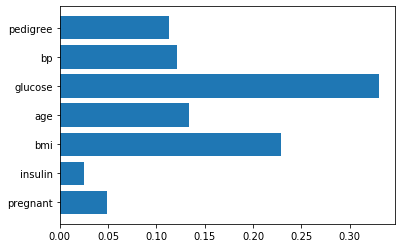

In [18]:
plt.barh(feature_cols,clf.feature_importances_)